<a href="https://colab.research.google.com/github/bugeki/portfolio_projects_of_data_analysis/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the project to build classification models for a variety of business settings. 

What is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

Classification techniques implemented in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project,  model deployed using *Streamlit*.

K-Means, Gradient Boosting, KNN, Random Forest, and Confusion Matrices.



# #Determines
A study is about to predict which employee will churn by using HR data of a company.

The HR dataset has 14,999 samples. In the dataset, there are two types of employee one who stayed and another who left the company.

10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, exploratory data analysis and data visualization techniques used. 

Then, data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms used. ***Cluster Analysis*** based on the information obtained during exploratory data analysis and data visualization processes performed. 

The purpose of clustering analysis is to cluster data with similar characteristics. ***K-means*** algorithm used to make cluster analysis. The data to the K-means algorithm must be scaled. In order to find the optimal number of clusters, ***Elbow method*** used. Briefly, individuals  related predicted by using K-means and the estimation results evaluated.

Once the data is ready to be applied to the model, *** the data splited into train and test***. Then a model built to predict whether employees will churn or not. 

Tried to make predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. The related modules of the ***scikit-learn*** library. Scikit-learn ***Confusion Metrics*** module for accuracy calculation. ***Yellowbrick*** module for model selection and visualization.

In the final step, model deployed using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [ ]:
df = pd.read_csv("HR_Dataset.csv")
df1=df.copy()
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


In [ ]:
len(df1[df1.duplicated()])

3008

In [ ]:
df1.drop_duplicates(inplace=True)
df1.reset_index(inplace=True, drop=True)
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.900,0.550,3,259,10,1,0,1,management,high
11987,0.740,0.950,5,266,10,0,0,1,management,high
11988,0.850,0.540,3,185,10,0,0,1,management,high
11989,0.330,0.650,3,172,10,0,0,1,marketing,high


### Data Insights

In the dataset, two types of employee one who stayed and another who left the company. So, data split into two groups and compared their characteristics. The average of both the groups found using groupby() and mean() function.

In [ ]:
df1.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667,0.716,3.787,198.943,3.262,0.174,0.019
1,0.440,0.722,3.883,208.162,3.881,0.053,0.004


## 2. Data Visualization

Factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

### Employees Left

How many employees were left?
Bar graph ploted using Matplotlib. The bar graph is suitable for showing discrete variable counts.

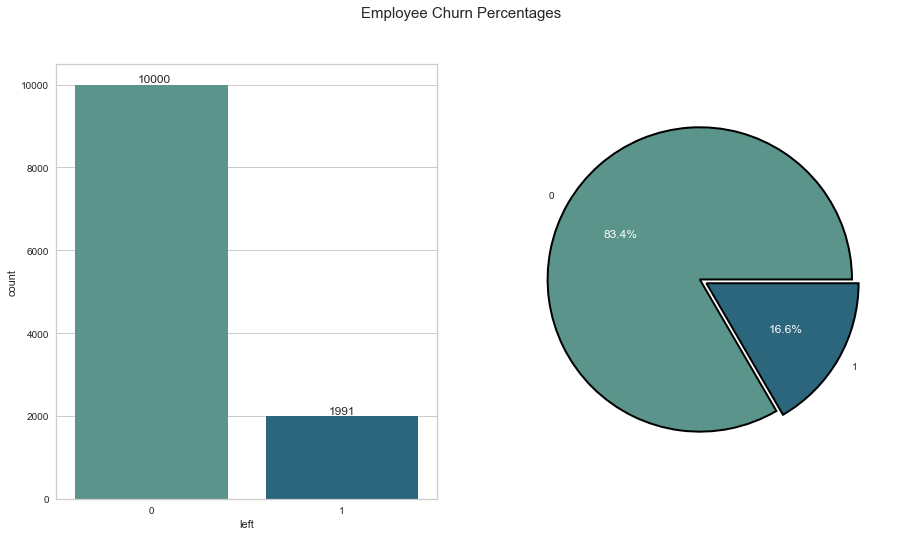

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (15, 8))
sns.countplot(df1.left, palette = "crest", ax=ax[0])
for p in ax[0].patches:
        ax[0].annotate('{}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+50))

_, _, autotexts = plt.pie(df1['left'].value_counts(ascending=False),labels=['0', '1'], autopct='%1.1f%%', explode=[0.025,0.025],
        wedgeprops = {"edgecolor" : "black", 'linewidth': 2, 'antialiased': True} , colors = ['#5a948a', '#2b667c']);
for ins in autotexts:
    ins.set_color('white');

plt.suptitle("Employee Churn Percentages", fontsize=15);

### Number of Projects

A bar graph to count the number of employees deployed on how many projects.

In [ ]:
proj_df=pd.DataFrame(df1.groupby(['number_project','left'])['number_project'].sum())
proj_df=proj_df.reset_index(1)
proj_df

,left,number_project
number_project,,
2,0,1450
2,1,1714
3,0,10446
3,1,114
4,0,13792
4,1,948
5,0,9450
5,1,1715
6,0,2730


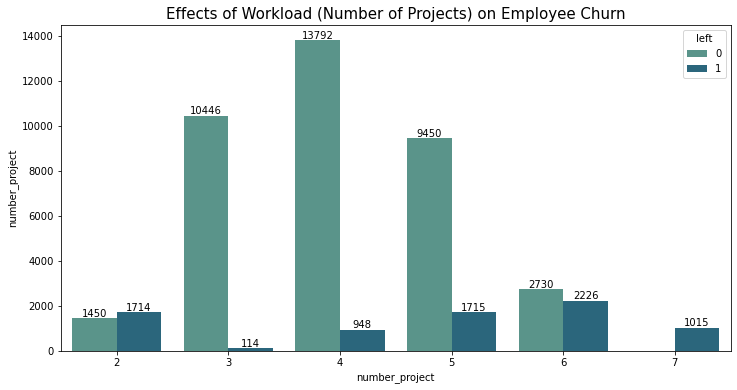

In [ ]:
plt.figure(figsize = (12, 6))
ax=sns.barplot(x=proj_df.index, y=proj_df['number_project'], hue=proj_df.left, palette = "crest")
plt.title("Effects of Workload (Number of Projects) on Employee Churn", fontsize=15);
for container in ax.containers:
    ax.bar_label(container);

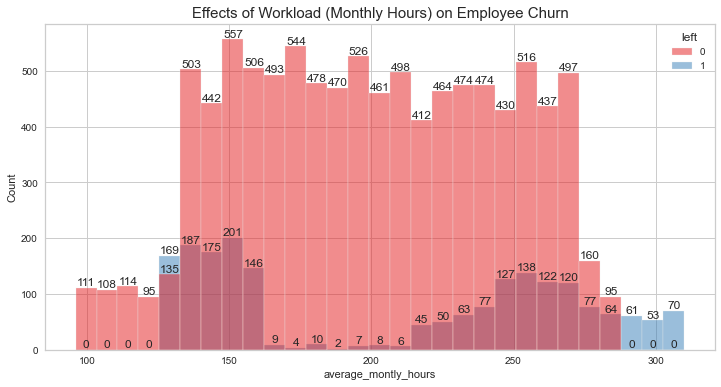

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.histplot(x = 'average_montly_hours' ,hue ='left' ,palette = "Set1" , data= df1);
for container in ax.containers:
    ax.bar_label(container);
plt.title("Effects of Workload (Monthly Hours) on Employee Churn", fontsize=15);

Working on 6 and 7 project are too much workload for employees.

### Time Spent in Company

A bar graph to count the number of employees have based on how much experience


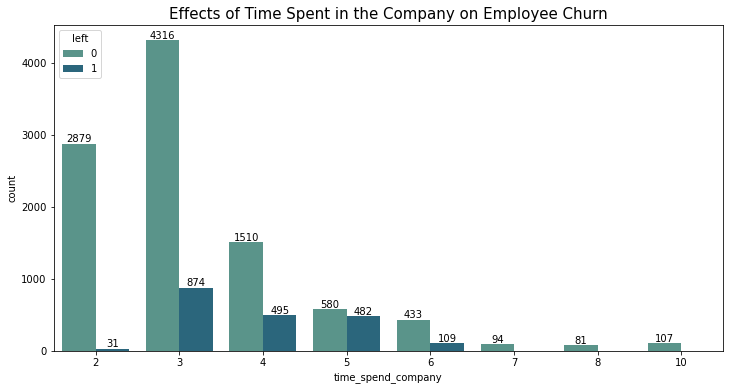

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.countplot(x = 'time_spend_company' ,hue ='left' ,palette = "crest" , data= df1);
plt.title("Effects of Time Spent in the Company on Employee Churn", fontsize=15);
for container in ax.containers:
    ax.bar_label(container);

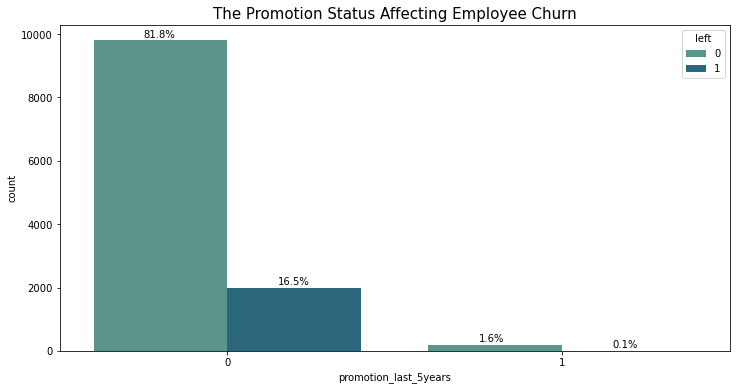

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.countplot(x = 'promotion_last_5years' ,hue ='left' ,palette = "crest" , data= df1);
total = float(len(df1))
    
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x-0.25, y+100))

plt.title("The Promotion Status Affecting Employee Churn", fontsize=15);

Approximately 82 percent of employees stayed and not promoted.

Approximately 16 percent of employees left and not promoted.

Approximately 2 percent of employees stayed and promoted.

Approximately 0.1 percent of employees left and promoted

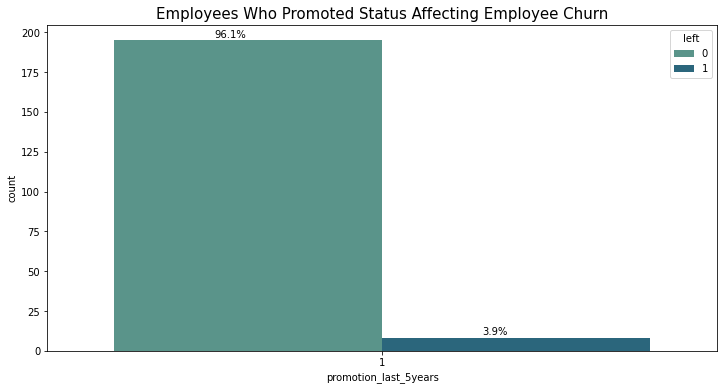

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.countplot(x = df1[df1.promotion_last_5years==1].promotion_last_5years ,hue ='left' ,palette = "crest" , data= df1);
total = float(len(df1[df1.promotion_last_5years==1]))
    
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x-0.25, y+2))

plt.title("Employees Who Promoted Status Affecting Employee Churn", fontsize=15);

Approximately 96 percent of employees who promoted are stayed

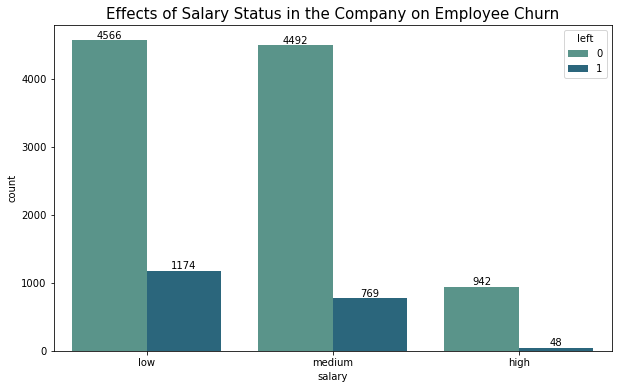

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(x = 'salary' ,hue ='left' ,palette = "crest" , data= df1);
for container in ax.containers:
    ax.bar_label(container);
plt.title("Effects of Salary Status in the Company on Employee Churn", fontsize=15);

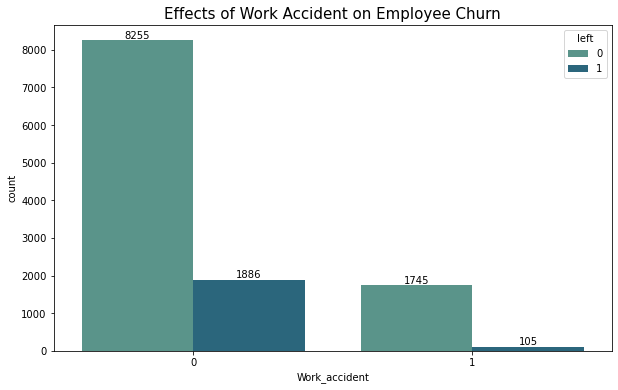

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(x = 'Work_accident' ,hue ='left' ,palette = "crest" , data= df1);
for container in ax.containers:
    ax.bar_label(container);
    plt.title("Effects of Work Accident on Employee Churn", fontsize=15);

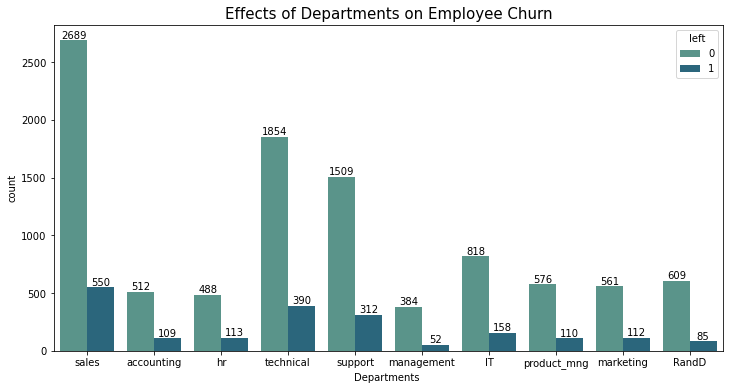

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.countplot(x = 'Departments ' ,hue ='left' ,palette = "crest" , data= df1);
for container in ax.containers:
    ax.bar_label(container);
plt.title("Effects of Departments on Employee Churn", fontsize=15);

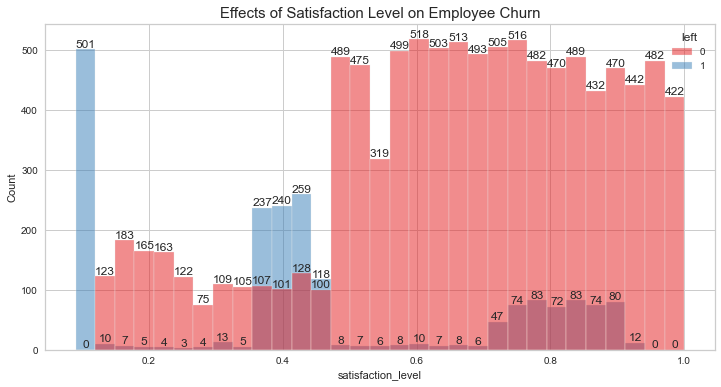

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.histplot(x = 'satisfaction_level' ,hue ='left' ,palette = "Set1" , data= df1);
for container in ax.containers:
    ax.bar_label(container);
plt.title("Effects of Satisfaction Level on Employee Churn", fontsize=15);

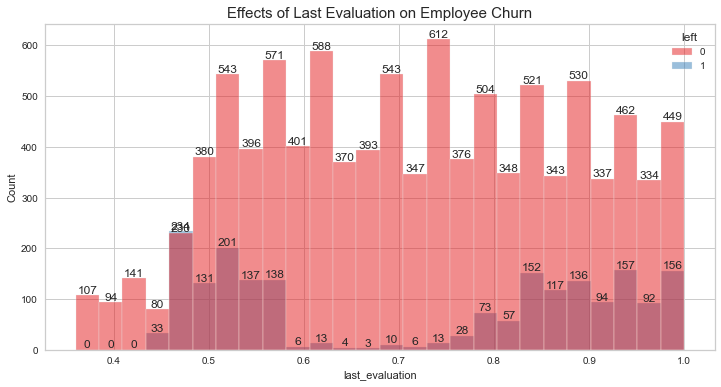

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
sns.histplot(x = 'last_evaluation' ,hue ='left' ,palette = "Set1" , data= df1);
for container in ax.containers:
    ax.bar_label(container);
plt.title("Effects of Last Evaluation on Employee Churn", fontsize=15);

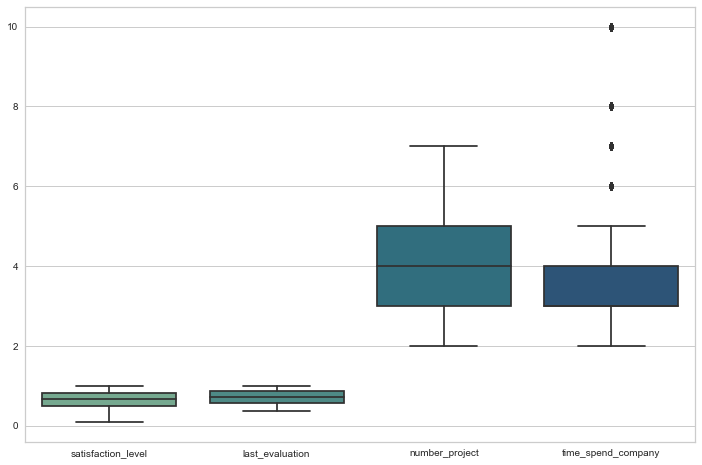

In [ ]:
plt.figure(figsize = (12, 8))
ax=sns.boxplot(data=df1.drop(['average_montly_hours', 'Work_accident', 'left', 'promotion_last_5years'], axis=1), palette = "crest")

In [ ]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

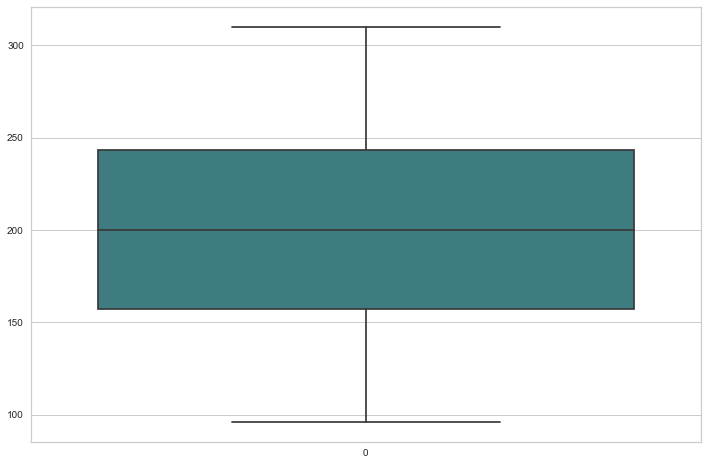

In [ ]:
plt.figure(figsize = (12, 8))
ax=sns.boxplot(data=df1.average_montly_hours, palette = "crest")

## 3. Data Pre-Processing

<Figure size 864x432 with 0 Axes>

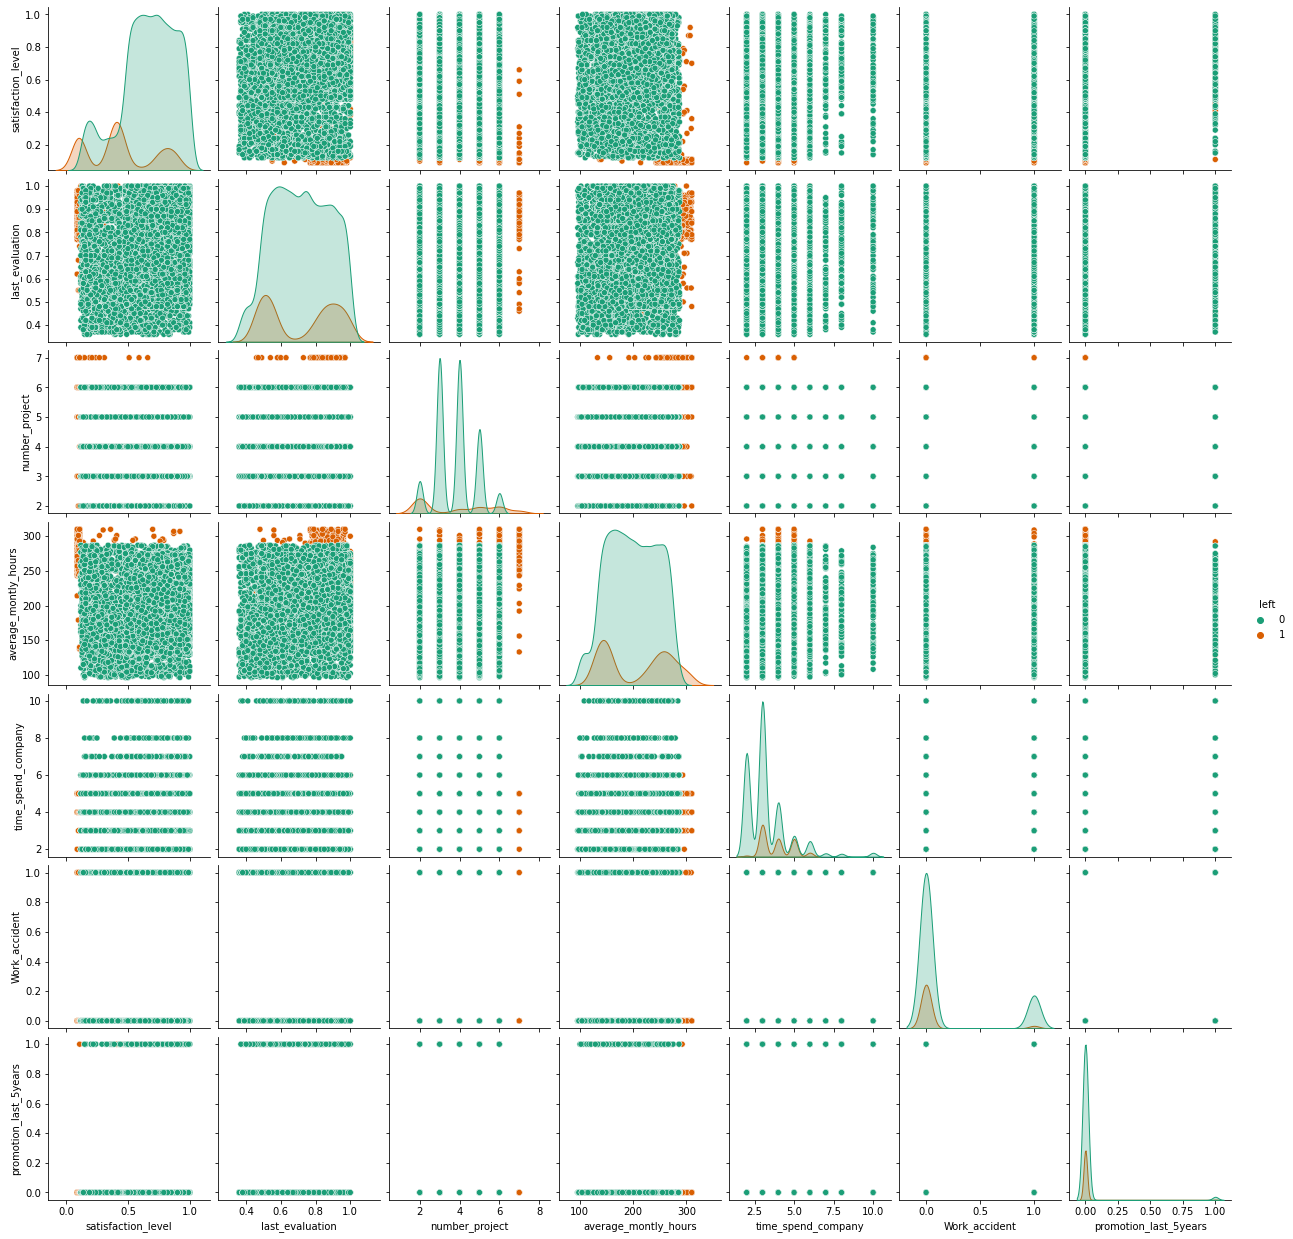

In [ ]:
plt.figure(figsize=(12,6))
sns.pairplot(df1,hue='left',palette='Dark2')

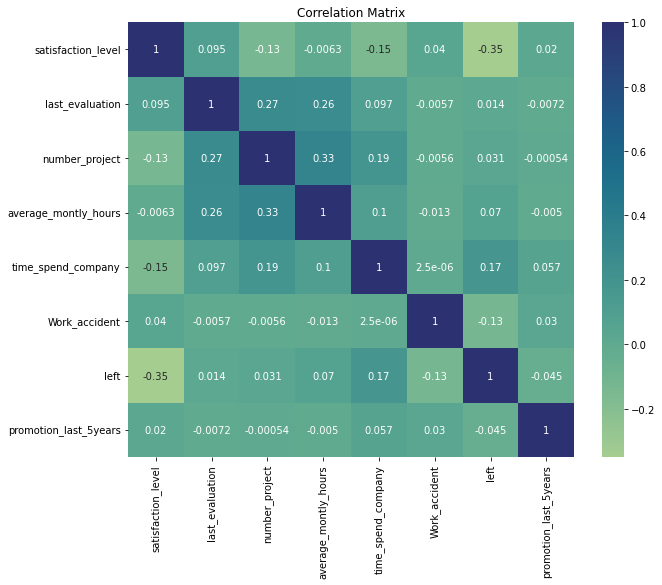

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.select_dtypes("number").corr(),annot=True, cmap='crest')
plt.title("Correlation Matrix")

plt.show()

#### Ordinal Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as ordinal encoding, and sklearn conveniently will do this for you using [OrdinalEncoder](https://datascience.stackexchange.com/questions/39317/difference-between-ordinalencoder-and-labelencoder).



In [ ]:
from sklearn.preprocessing import OrdinalEncoder
df_enc=df1.copy()
scale_mapper = {"Low":0, "Medium":1, "High":2}
df_enc["salary"] = df_enc["salary"].replace(scale_mapper)

enc = OrdinalEncoder()
df_enc[["salary"]] = enc.fit_transform(df_enc[["salary"]])

df_enc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,1.000
1,0.800,0.860,5,262,6,0,1,0,sales,2.000
2,0.110,0.880,7,272,4,0,1,0,sales,2.000
3,0.720,0.870,5,223,5,0,1,0,sales,1.000
4,0.370,0.520,2,159,3,0,1,0,sales,1.000
...,...,...,...,...,...,...,...,...,...,...
11986,0.900,0.550,3,259,10,1,0,1,management,0.000
11987,0.740,0.950,5,266,10,0,0,1,management,0.000
11988,0.850,0.540,3,185,10,0,0,1,management,0.000
11989,0.330,0.650,3,172,10,0,0,1,marketing,0.000


In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
cat=pd.DataFrame(categorical_transformer.fit_transform(df_enc[['Departments ']]).toarray())
df_enc=df_enc.join(cat)
df_enc.drop('Departments ', axis=1, inplace=True)
df_enc

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,0,1,2,3,4,5,6,7,8,9
0,0.380,0.530,2,157,3,0,1,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
1,0.800,0.860,5,262,6,0,1,0,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
2,0.110,0.880,7,272,4,0,1,0,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
3,0.720,0.870,5,223,5,0,1,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
4,0.370,0.520,2,159,3,0,1,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.900,0.550,3,259,10,1,0,1,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
11987,0.740,0.950,5,266,10,0,0,1,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
11988,0.850,0.540,3,185,10,0,0,1,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
11989,0.330,0.650,3,172,10,0,0,1,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000


#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [ ]:
df_enc.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,0,1,2,3,4,5,6,7,8,9
count,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000,11991.000
mean,0.630,0.717,3.803,200.474,3.365,0.154,0.166,0.017,1.356,0.081,0.058,0.052,0.050,0.036,0.056,0.057,0.270,0.152,0.187
std,0.241,0.168,1.163,48.728,1.330,0.361,0.372,0.129,0.628,0.273,0.234,0.222,0.218,0.187,0.230,0.232,0.444,0.359,0.390
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.480,0.570,3.000,157.000,3.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.660,0.720,4.000,200.000,3.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.820,0.860,5.000,243.000,4.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [ ]:
X = df_enc.drop(columns = ['left'])
y = df_enc['left']

In [ ]:
from sklearn.preprocessing import scale, MinMaxScaler
scaler = MinMaxScaler() #Because it is not gaussian
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.02197802, 0.8125    , 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.83516484, 0.28125   , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.26373626, 0.453125  , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.45054945, 0.578125  , 0.4       , ..., 0.        , 0.        ,
        0.        ]])

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [ ]:
# pip install pyclustertend

In [ ]:
from pyclustertend import hopkins

hopkins(X_scaled, X_scaled.shape[0])

0.08133099118826402

In [ ]:
from sklearn.cluster import KMeans

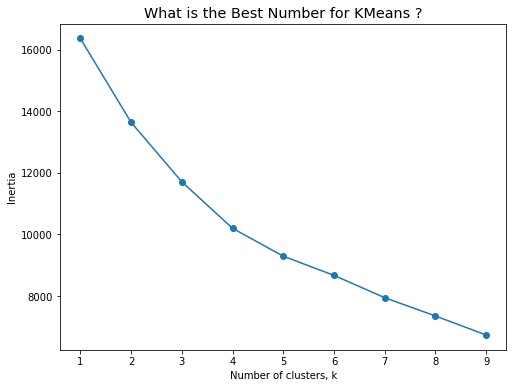

In [ ]:
ks = range(1,10)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(X_scaled)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(8, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

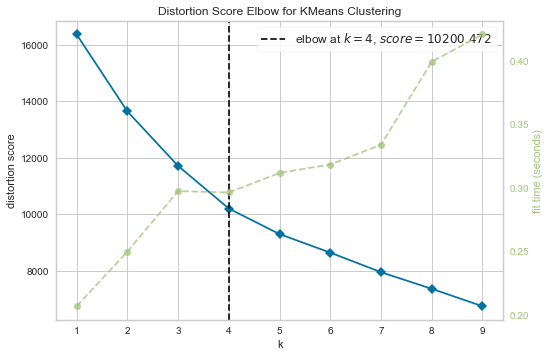

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(X_scaled)
visu.show();

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

ssd =[]

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.17085214503639956
Silhouette Score for 3 clusters: 0.24178486108229388
Silhouette Score for 4 clusters: 0.2979656848519182
Silhouette Score for 5 clusters: 0.3307451136110572
Silhouette Score for 6 clusters: 0.35415239171505924
Silhouette Score for 7 clusters: 0.37173496387759397
Silhouette Score for 8 clusters: 0.4039085983454007
Silhouette Score for 9 clusters: 0.42077262415312966


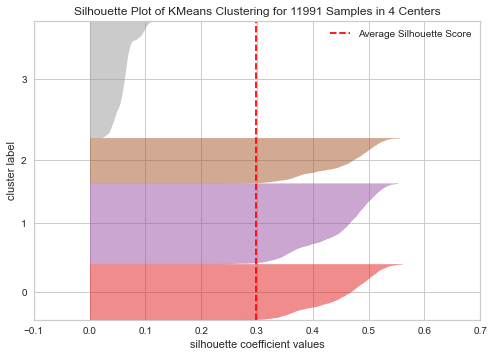

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model_4 = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model_4)
visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

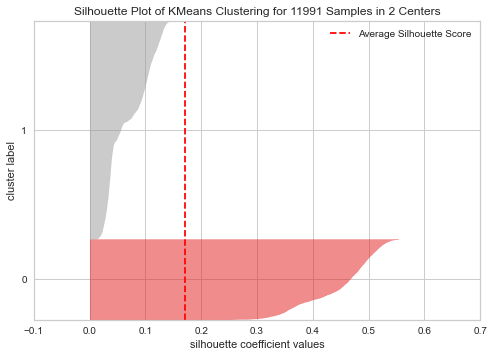

In [ ]:
model_2 = KMeans(n_clusters=2, random_state=101)
visualizer = SilhouetteVisualizer(model_2)
visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [ ]:
k_means_model = KMeans(n_clusters = 2, random_state = 101)
k_means_model.fit_predict(X_scaled)
labels = k_means_model.labels_
labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
df2=df1.copy()
df2['predicted_clusters'] = labels
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,predicted_clusters
0,0.380,0.530,2,157,3,0,1,0,sales,low,0
1,0.800,0.860,5,262,6,0,1,0,sales,medium,0
2,0.110,0.880,7,272,4,0,1,0,sales,medium,0
3,0.720,0.870,5,223,5,0,1,0,sales,low,0
4,0.370,0.520,2,159,3,0,1,0,sales,low,0


In [ ]:
pd.crosstab(df2['left'], df2['predicted_clusters'])

predicted_clusters,0,1
left,,
0,2689,7311
1,550,1441


In [ ]:
df2.groupby(['predicted_clusters']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
predicted_clusters,,,,,,,,
0,0.631,0.710,3.777,200.242,3.381,0.154,0.170,0.018
1,0.629,0.719,3.812,200.559,3.359,0.154,0.165,0.017


## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts, for example, in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate,  cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer, precision_score, recall_score
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score

In [ ]:
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,0,1,2,3,4,5,6,7,8,9
0,0.380,0.530,2,157,3,0,1,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
1,0.800,0.860,5,262,6,0,1,0,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
2,0.110,0.880,7,272,4,0,1,0,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
3,0.720,0.870,5,223,5,0,1,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
4,0.370,0.520,2,159,3,0,1,0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000


In [ ]:
X = df_enc.drop('left', axis=1)
y = df_enc['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 101)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### #Gradient Boosting Classifier

#### Model Building

In [ ]:
GB_model = GradientBoostingClassifier(random_state = 101)
GB_model.fit(X_train, y_train)
y_pred = GB_model.predict(X_test)

#### Evaluating Model Performance

In [ ]:
eval_metric(GB_model, X_train, y_train, X_test, y_test)

Test_Set
[[2976   25]
 [  44  553]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.96      0.93      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.96      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6958   41]
 [  99 1295]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.97      0.93      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



- Confusion Matrix : Scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

> Girintili blok



    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

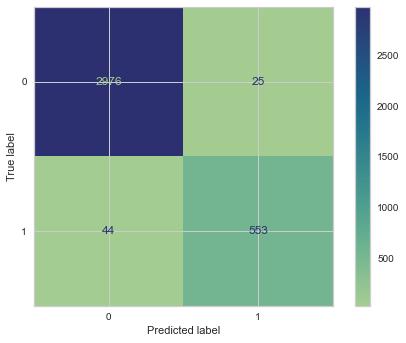

In [ ]:
 plot_confusion_matrix(GB_model, X_test, y_test, cmap="crest")

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

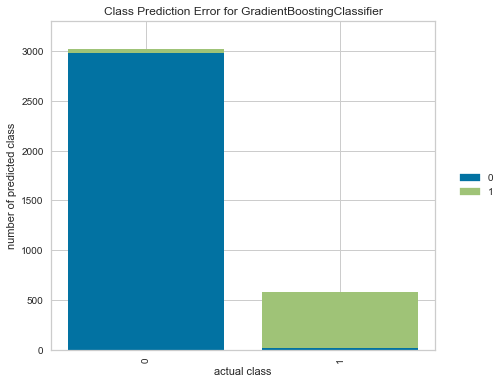

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(GB_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [ ]:
GB_feature_imp = pd.DataFrame(index=X.columns, data = GB_model.feature_importances_, columns = ['Feature Importance']).sort_values("Feature Importance", ascending = False)
GB_feature_imp

,Feature Importance
satisfaction_level,0.528
number_project,0.138
time_spend_company,0.136
last_evaluation,0.122
average_montly_hours,0.075
Work_accident,0.000
salary,0.000
1,0.000
4,0.000
6,0.000


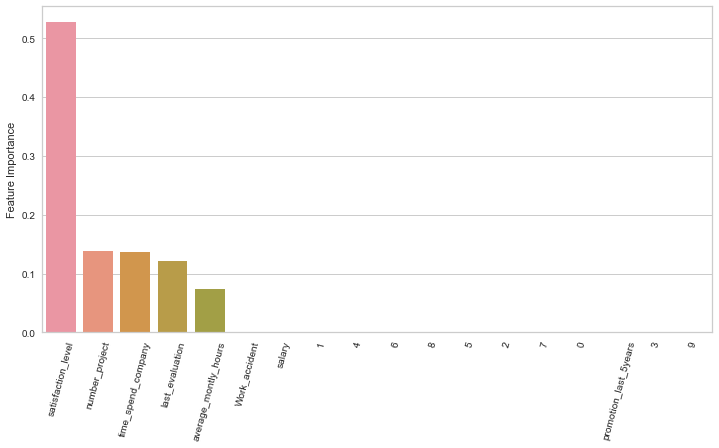

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = GB_feature_imp.sort_values('Feature Importance', ascending = False), x = GB_feature_imp.sort_values('Feature Importance', ascending = False).index, y = 'Feature Importance')
plt.xticks(rotation = 75);

In [ ]:
GB_cv_scores = cross_validate(GB_model, X_train, y_train, 
                              scoring = ['accuracy', 'precision','recall', 'f1'], cv = 10)
GB_cv_scores = pd.DataFrame(GB_cv_scores, index = range(1, 11))

GB_cv_scores.mean()[2:]

test_accuracy    0.981
test_precision   0.963
test_recall      0.922
test_f1          0.942
dtype: float64

In [ ]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4, "none"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [ ]:
from sklearn.model_selection import GridSearchCV
GB_grid_model = GridSearchCV(GB_model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
GB_grid_model.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=300, random_state=101)

In [ ]:
eval_metric(GB_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2981   20]
 [  44  553]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.97      0.93      0.95       597

    accuracy                           0.98      3598
   macro avg       0.98      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6970   29]
 [  96 1298]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.98      0.93      0.95      1394

    accuracy                           0.99      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.99      0.99      0.98      8393



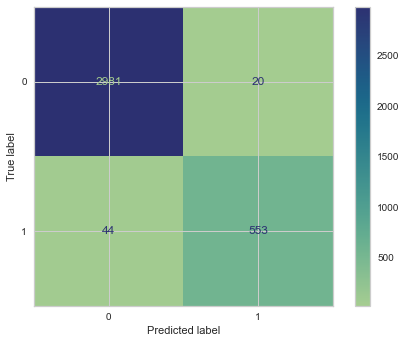

In [ ]:
 plot_confusion_matrix(GB_grid_model, X_test, y_test, cmap="crest")

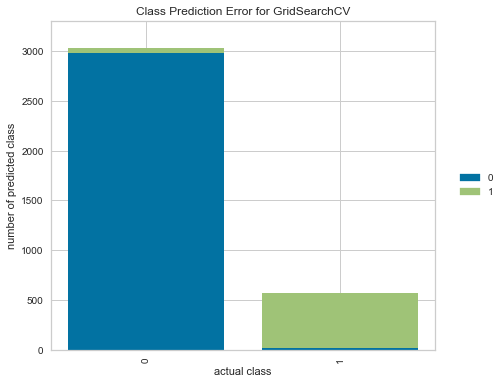

In [ ]:
visualizer = ClassPredictionError(GB_grid_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

In [ ]:
GB_tuned = GradientBoostingClassifier(max_features=4, n_estimators=300).fit(X_train, y_train)

In [ ]:
y_pred = GB_tuned.predict(X_test)
y_train_pred = GB_tuned.predict(X_train)

GB_tuned_f1 = f1_score(y_test, y_pred)
GB_tuned_acc = accuracy_score(y_test, y_pred)
GB_tuned_recall = recall_score(y_test, y_pred)
GB_tuned_pre = precision_score(y_test, y_pred)

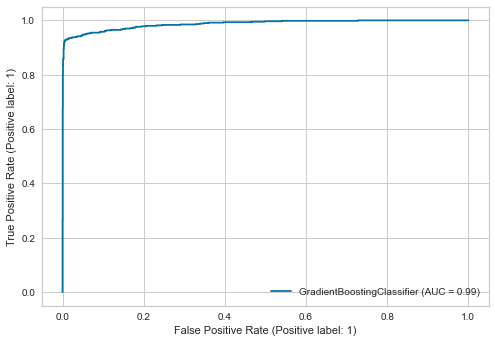

In [ ]:
plot_roc_curve(GB_tuned , X_test, y_test);

#### Prediction

In [ ]:
GB_Pred = {"Actual": y_test, "GB_Pred":y_pred}
GB_Pred = pd.DataFrame.from_dict(GB_Pred)
GB_Pred.head(20)

,Actual,GB_Pred
3109,0,0
10481,0,0
1104,1,1
3813,0,0
6864,0,0
9572,0,0
9703,0,0
8785,0,0
4821,0,0
179,1,1


### #KNeighbors Classifier

#### Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_error_rates = []

for k in range(1,30):
    KNN_model = KNeighborsClassifier(n_neighbors=k)
    KNN_model.fit(X_train,y_train) 
   
    y_pred = KNN_model.predict(X_test)
        
    test_error = 1 - accuracy_score(y_test,y_pred)
    
    test_error_rates.append(test_error)
      
print(test_error_rates)
    

[0.053362979433018376, 0.04252362423568645, 0.05169538632573656, 0.04474708171206221, 0.054752640355753224, 0.05058365758754868, 0.05614230127848807, 0.05530850472484716, 0.059755419677598676, 0.05808782657031686, 0.06142301278488049, 0.06336853807670928, 0.06698165647581988, 0.06698165647581988, 0.07115063924402443, 0.06809338521400776, 0.07059477487493049, 0.07059477487493049, 0.07365202890494715, 0.07559755419677594, 0.0778210116731517, 0.07865480822679272, 0.0797665369649806, 0.08004446914952756, 0.08171206225680938, 0.08087826570316847, 0.08226792662590332, 0.08560311284046696, 0.08643690939410786]


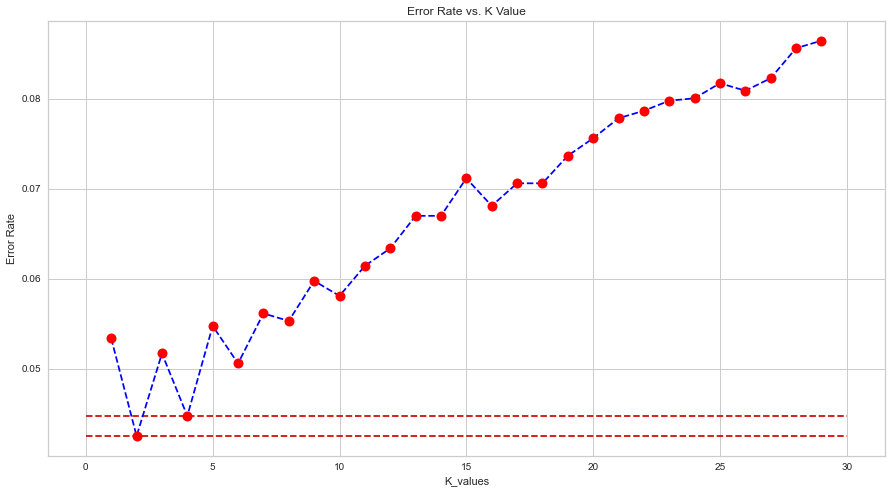

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.042523, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.044747, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors = 2)
KNN_model.fit(X_train,y_train)
eval_metric(KNN_model, X_train, y_train, X_test, y_test)

KNN_tuned_f1 = f1_score(y_test, y_pred)
KNN_tuned_acc = accuracy_score(y_test, y_pred)
KNN_tuned_recall = recall_score(y_test, y_pred)
KNN_tuned_pre = precision_score(y_test, y_pred)

Test_Set
[[2951   50]
 [ 103  494]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3001
           1       0.91      0.83      0.87       597

    accuracy                           0.96      3598
   macro avg       0.94      0.91      0.92      3598
weighted avg       0.96      0.96      0.96      3598


Train_Set
[[6999    0]
 [ 165 1229]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6999
           1       1.00      0.88      0.94      1394

    accuracy                           0.98      8393
   macro avg       0.99      0.94      0.96      8393
weighted avg       0.98      0.98      0.98      8393



In [ ]:
KNN4_model = KNeighborsClassifier(n_neighbors = 4)
KNN4_model.fit(X_train,y_train)
eval_metric(KNN4_model, X_train, y_train, X_test, y_test)

Test_Set
[[2930   71]
 [  90  507]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3001
           1       0.88      0.85      0.86       597

    accuracy                           0.96      3598
   macro avg       0.92      0.91      0.92      3598
weighted avg       0.95      0.96      0.95      3598


Train_Set
[[6904   95]
 [ 175 1219]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6999
           1       0.93      0.87      0.90      1394

    accuracy                           0.97      8393
   macro avg       0.95      0.93      0.94      8393
weighted avg       0.97      0.97      0.97      8393



In [ ]:
KNN5_model = KNeighborsClassifier(n_neighbors = 5)
KNN5_model.fit(X_train,y_train)
eval_metric(KNN5_model, X_train, y_train, X_test, y_test)

Test_Set
[[2884  117]
 [  80  517]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      3001
           1       0.82      0.87      0.84       597

    accuracy                           0.95      3598
   macro avg       0.89      0.91      0.90      3598
weighted avg       0.95      0.95      0.95      3598


Train_Set
[[6830  169]
 [ 161 1233]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6999
           1       0.88      0.88      0.88      1394

    accuracy                           0.96      8393
   macro avg       0.93      0.93      0.93      8393
weighted avg       0.96      0.96      0.96      8393



#### Evaluating Model Performance

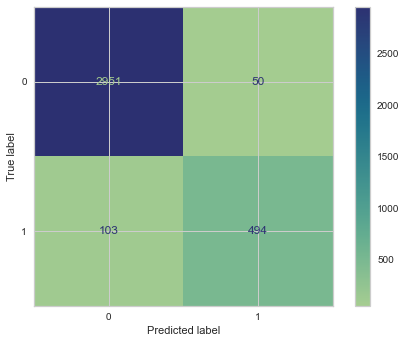

In [ ]:
 plot_confusion_matrix(KNN_model, X_test, y_test, cmap="crest")

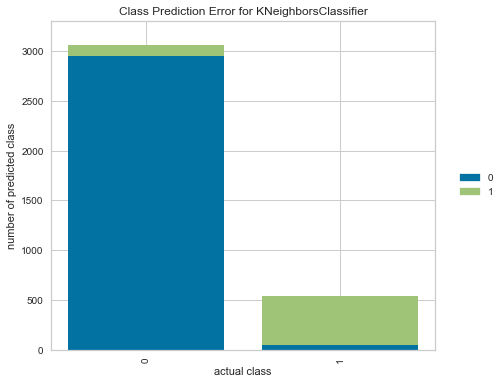

In [ ]:
visualizer = ClassPredictionError(KNN_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

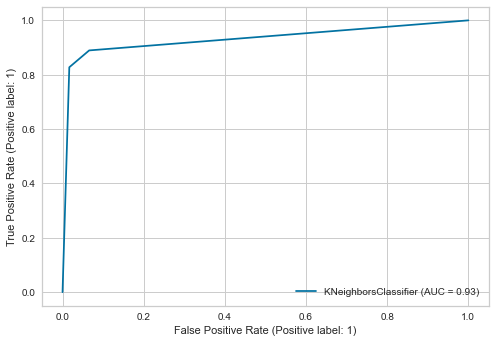

In [ ]:
plot_roc_curve(KNN_model, X_test, y_test);

#### Prediction

In [ ]:
KNN_Pred = {"Actual": y_test, "KNN_Pred":y_pred}
KNN_Pred = pd.DataFrame.from_dict(KNN_Pred)
KNN_Pred.head(20)

,Actual,KNN_Pred
3109,0,0
10481,0,0
1104,1,1
3813,0,0
6864,0,0
9572,0,0
9703,0,0
8785,0,0
4821,0,1
179,1,1


In [ ]:
Model_Preds = GB_Pred.merge((KNN_Pred.drop("Actual", axis = 1)), left_index = True, right_index = True)
Model_Preds.head(20)

,Actual,GB_Pred,KNN_Pred
3109,0,0,0
10481,0,0,0
1104,1,1,1
3813,0,0,0
6864,0,0,0
9572,0,0,0
9703,0,0,0
8785,0,0,0
4821,0,0,1
179,1,1,1


### #Random Forest Classifier

#### Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(class_weight = "balanced", random_state = 101)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

#### Evaluating Model Performance

In [ ]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[2996    5]
 [  57  540]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.99      0.90      0.95       597

    accuracy                           0.98      3598
   macro avg       0.99      0.95      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6999    0]
 [   0 1394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      1394

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



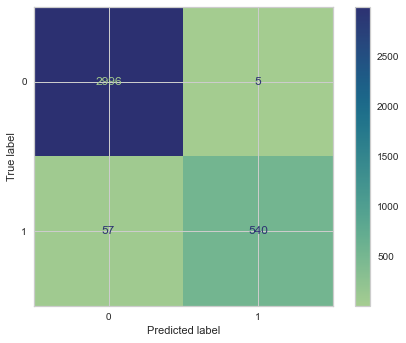

In [ ]:
 plot_confusion_matrix(RF_model, X_test, y_test, cmap="crest")

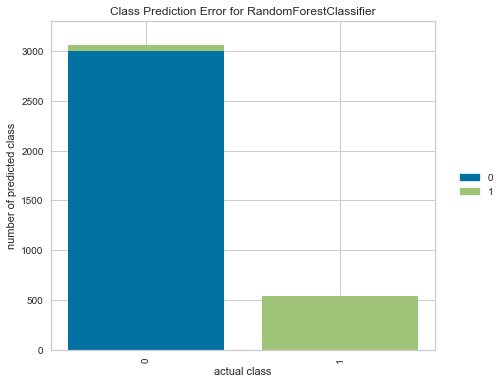

In [ ]:
visualizer = ClassPredictionError(RF_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

In [ ]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = RF_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
satisfaction_level,0.278
time_spend_company,0.232
average_montly_hours,0.154
number_project,0.152
last_evaluation,0.134
salary,0.012
Work_accident,0.012
7,0.004
9,0.004
8,0.003


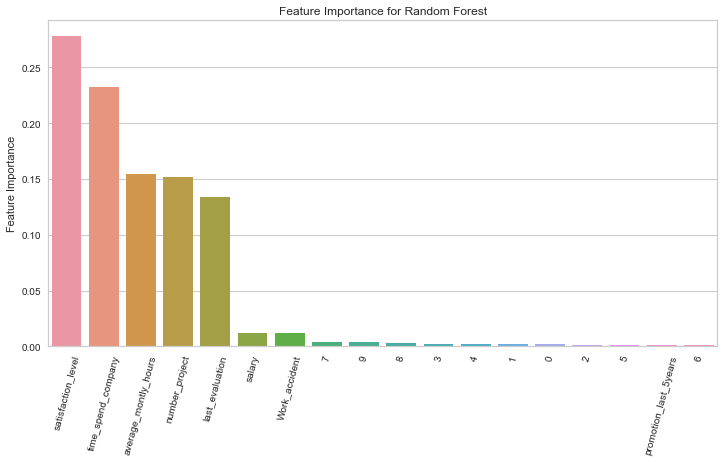

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.barplot(y=rf_feature_imp["Feature Importance"], x=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
plt.xticks(rotation = 75);

In [ ]:
RF_cv_scores = cross_validate(RF_model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
RF_cv_scores = pd.DataFrame(RF_cv_scores, index = range(1, 11))

RF_cv_scores.mean()[2:]

test_accuracy    0.983
test_precision   0.989
test_recall      0.905
test_f1          0.945
dtype: float64

In [ ]:
param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[3, 4, 5, 6, 7, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [ ]:
from sklearn.model_selection import GridSearchCV
RF_grid_model = GridSearchCV(RF_model, param_grid, scoring = "recall", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
RF_grid_model.best_params_

{'max_depth': 3,
 'max_features': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2777  224]
 [  43  554]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3001
           1       0.71      0.93      0.81       597

    accuracy                           0.93      3598
   macro avg       0.85      0.93      0.88      3598
weighted avg       0.94      0.93      0.93      3598


Train_Set
[[6460  539]
 [  80 1314]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      6999
           1       0.71      0.94      0.81      1394

    accuracy                           0.93      8393
   macro avg       0.85      0.93      0.88      8393
weighted avg       0.94      0.93      0.93      8393



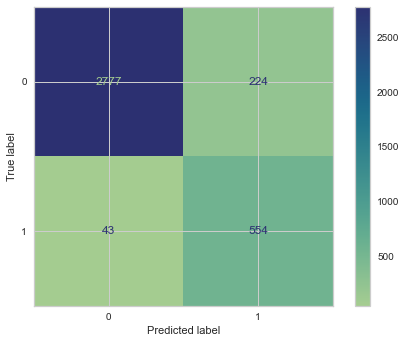

In [ ]:
 plot_confusion_matrix(RF_grid_model, X_test, y_test, cmap="crest")

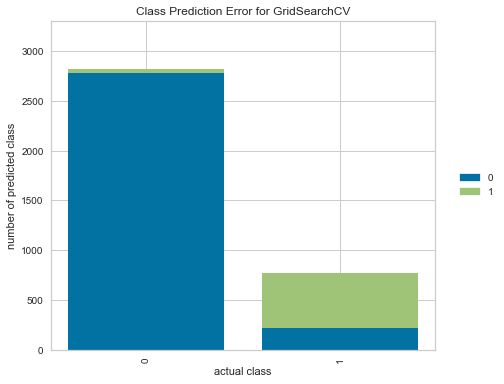

In [ ]:
visualizer = ClassPredictionError(RF_grid_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof();

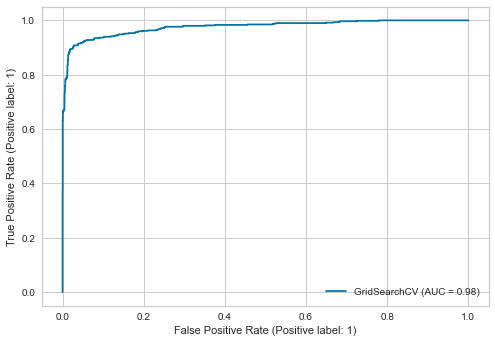

In [ ]:
plot_roc_curve(RF_grid_model, X_test, y_test);

In [ ]:
RF_tuned = RandomForestClassifier(class_weight = 'balanced',
                                  max_depth = 3,
                                  max_features = 6,
                                  n_estimators = 100,
                                  min_samples_split = 2,
                                  random_state = 101).fit(X_train, y_train)

In [ ]:
y_pred = RF_tuned.predict(X_test)
y_train_pred = RF_tuned.predict(X_train)

RF_tuned_f1 = f1_score(y_test, y_pred)
RF_tuned_acc = accuracy_score(y_test, y_pred)
RF_tuned_recall = recall_score(y_test, y_pred)
RF_tuned_pre = precision_score(y_test, y_pred)

#### Prediction

In [ ]:
RF_Pred = {"Actual": y_test, "RF_Pred":y_pred}
RF_Pred = pd.DataFrame.from_dict(RF_Pred)
RF_Pred.head(20)

,Actual,RF_Pred
3109,0,0
10481,0,0
1104,1,1
3813,0,0
6864,0,0
9572,0,0
9703,0,0
8785,0,0
4821,0,0
179,1,1


In [ ]:
Model_Preds = pd.merge(Model_Preds, (RF_Pred.drop("Actual", axis = 1)), left_index = True, right_index = True)
Model_Preds.head(20)

,Actual,GB_Pred,KNN_Pred,RF_Pred
3109,0,0,0,0
10481,0,0,0,0
1104,1,1,1,1
3813,0,0,0,0
6864,0,0,0,0
9572,0,0,0,0
9703,0,0,0,0
8785,0,0,0,0
4821,0,0,1,0
179,1,1,1,1


## Comparing Results

In [ ]:
Model_Preds.sample(20)

,Actual,GB_Pred,KNN_Pred,RF_Pred
11879,0,0,0,0
3531,0,0,0,0
5969,0,0,0,0
10009,0,0,0,0
1873,1,1,1,1
9343,0,0,0,0
7440,0,0,0,0
6897,0,0,0,0
547,1,1,1,1
5452,0,0,0,0


In [ ]:
compare = pd.DataFrame({"Model": ["GB_tuned", "KNN_tuned", "RF_tuned"],
                        
                        "F1_Score": [GB_tuned_f1, KNN_tuned_f1, RF_tuned_f1],
                                                 
                        "Accuracy_Score": [GB_tuned_acc, KNN_tuned_acc, RF_tuned_acc],
                        
                        "Recall_Score": [GB_tuned_recall, KNN_tuned_recall, RF_tuned_recall],
                       
                        "Precision_Score": [GB_tuned_pre, KNN_tuned_pre, RF_tuned_pre]})

In [ ]:
import plotly.express as px

compare = compare.sort_values(by="Accuracy_Score", ascending=True)
fig = px.bar(compare, x = "Accuracy_Score", y = "Model", title = "Accuracy_Score")
fig.show()

compare = compare.sort_values(by="Precision_Score", ascending=True)
fig = px.bar(compare, x = "Precision_Score", y = "Model", title = "Precision_Score")
fig.show()

compare = compare.sort_values(by="Recall_Score", ascending=True)
fig = px.bar(compare, x = "Recall_Score", y = "Model", title = "Recall_Score")
fig.show()

compare = compare.sort_values(by="F1_Score", ascending=True)
fig = px.bar(compare, x = "F1_Score", y = "Model", title = "F1_Score")
fig.show()

### Comparing Models with Pipeline 

In [ ]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


In [ ]:
X = df1.drop('left', axis=1)
y = df1['left']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y ,random_state=101)

In [ ]:
scalers = [MinMaxScaler(), StandardScaler()]
models = [RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier()]

In [ ]:
import itertools

In [ ]:
exp = list(itertools.product(models, scalers))

In [ ]:
exp

[(RandomForestClassifier(), MinMaxScaler()),
 (RandomForestClassifier(), StandardScaler()),
 (GradientBoostingClassifier(), MinMaxScaler()),
 (GradientBoostingClassifier(), StandardScaler()),
 (KNeighborsClassifier(), MinMaxScaler()),
 (KNeighborsClassifier(), StandardScaler())]

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
numeric_features = ["salary"]
numeric_transformer = OrdinalEncoder()

categorical_features = ["Departments "]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

model_names = []
scores_results = []

for mo, sc in exp:
    col = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ('scaler', sc, ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years'] )
    ], remainder='passthrough')
    
    est = Pipeline (
    
    steps= [('preprocessor', col),('model', mo)])
    
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    results = cross_val_score(est, X_train, y_train, cv=skf, scoring="recall")
    #preds = est.predict(X_test)
    #score = recall_score(y_test, preds)
    scores_results.append(results)
    print(results)
    name = str(mo)[:-2] + " " + str(sc)[:-2]
    model_names.append(name)
    
    print(f"Score for {mo} with {sc}: {results.mean()}")

[0.93571429 0.92857143 0.92142857 0.90647482 0.92805755 0.90647482
 0.87769784 0.89928058 0.92086331 0.87142857]
Score for RandomForestClassifier() with MinMaxScaler(): 0.9095991778006167
[0.92142857 0.92857143 0.90714286 0.91366906 0.92086331 0.9352518
 0.87769784 0.92086331 0.89208633 0.90714286]
Score for RandomForestClassifier() with StandardScaler(): 0.9124717368961972
[0.91428571 0.90714286 0.92857143 0.94244604 0.92086331 0.91366906
 0.90647482 0.92086331 0.9352518  0.94285714]
Score for GradientBoostingClassifier() with MinMaxScaler(): 0.9232425488180885
[0.94285714 0.92857143 0.92857143 0.92086331 0.9352518  0.9352518
 0.92086331 0.9352518  0.89208633 0.88571429]
Score for GradientBoostingClassifier() with StandardScaler(): 0.9225282631038028
[0.85       0.85       0.84285714 0.87769784 0.88489209 0.88489209
 0.83453237 0.89208633 0.84892086 0.85      ]
Score for KNeighborsClassifier() with MinMaxScaler(): 0.8615878725590955
[0.88571429 0.92857143 0.95714286 0.91366906 0.93525

In [ ]:
model_names

['RandomForestClassifier MinMaxScaler',
 'RandomForestClassifier StandardScaler',
 'GradientBoostingClassifier MinMaxScaler',
 'GradientBoostingClassifier StandardScaler',
 'KNeighborsClassifier MinMaxScaler',
 'KNeighborsClassifier StandardScaler']

In [ ]:
scores_results

[array([0.93571429, 0.92857143, 0.92142857, 0.90647482, 0.92805755,
        0.90647482, 0.87769784, 0.89928058, 0.92086331, 0.87142857]),
 array([0.92142857, 0.92857143, 0.90714286, 0.91366906, 0.92086331,
        0.9352518 , 0.87769784, 0.92086331, 0.89208633, 0.90714286]),
 array([0.91428571, 0.90714286, 0.92857143, 0.94244604, 0.92086331,
        0.91366906, 0.90647482, 0.92086331, 0.9352518 , 0.94285714]),
 array([0.94285714, 0.92857143, 0.92857143, 0.92086331, 0.9352518 ,
        0.9352518 , 0.92086331, 0.9352518 , 0.89208633, 0.88571429]),
 array([0.85      , 0.85      , 0.84285714, 0.87769784, 0.88489209,
        0.88489209, 0.83453237, 0.89208633, 0.84892086, 0.85      ]),
 array([0.88571429, 0.92857143, 0.95714286, 0.91366906, 0.9352518 ,
        0.92805755, 0.84892086, 0.88489209, 0.91366906, 0.85714286])]

In [ ]:
len(scores_results)+1

7

In [ ]:
import cufflinks as cf
import plotly.offline

In [ ]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [ ]:
pd.DataFrame(scores_results, index=model_names, columns=[a for a in range(1, len(results)+1)]).T.iplot(kind="box", boxpoints="all")

## 6. Model Deployement



In [ ]:
import pickle
gradient_boosting_classifier = pickle.dump(GB_tuned, open('gradient_boosting_model', 'wb'))

### Save and Export the Model as .pkl

In [ ]:
pickle.dump(model, open('gradient_boosting_model.pkl', 'wb'))

### Save and Export Variables as .pkl

In [ ]:
df_enc.columns

Index([   'satisfaction_level',       'last_evaluation',
              'number_project',  'average_montly_hours',
          'time_spend_company',         'Work_accident',
                        'left', 'promotion_last_5years',
                      'salary',                       0,
                             1,                       2,
                             3,                       4,
                             5,                       6,
                             7,                       8,
                             9],
      dtype='object')

In [ ]:
col_lst = [   'satisfaction_level',       'last_evaluation',
              'number_project',  'average_montly_hours',
          'time_spend_company',         'Work_accident',
                        'left', 'promotion_last_5years',
                      'salary',                       0,
                             1,                       2,
                             3,                       4,
                             5,                       6,
                             7,                       8,
                             9]

scaler = MinMaxScaler()
scaler_fitted = scaler.fit(df_enc[col_lst])
scaler_deploy = pickle.dump(scaler_fitted, open('scaler.pkl', 'wb'))